In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.contingency import association

In [3]:
df = pd.read_csv('/content/Copy of exhibitions_for_analysis - exhibitions.csv')

In [4]:
df.head()

,url,country_of_museum,Museum,Museum_full,City_of_museum,Focus_area,Year_of_foundation,Area (m²),Number_of_visitors_per_year (2022),type,...,co-org,sponsor,url.1,objects_type,object_material,object_purpose,online/offline,admission fee,highlights,assotiated events
0,1,GB,BM,British Museum,London,historical,1753.0,75 000,4097253,exhibition,...,Museo de Arte de Lima,PROMPeru,https://www.britishmuseum.org/exhibitions/peru...,ceramics,"metal, textile, stone, wood, clay","cooking, storing food and water, decorative, s...",offline,True,11,TRUE
1,2,GB,BM,British Museum,London,historical,1753.0,75 000,4097253,exhibition,...,NaN,British Petroleum,https://www.britishmuseum.org/exhibitions/hier...,texts,stone,"commemoration, communication",offline,True,7,TRUE
2,3,GB,BM,British Museum,London,historical,1753.0,75 000,4097253,touring exhibition,...,NaN,NaN,https://www.britishmuseum.org/our-work/nationa...,ritual objects,"stone, wood",spiritual,offline,True,NaN,FALSE
3,4,GB,BM,British Museum,London,historical,1753.0,75 000,4097253,touring exhibition,...,NaN,NaN,https://www.britishmuseum.org/our-work/interna...,ritual objects,remains,spiritual,offline,True,1,FALSE
4,5,GB,BM,British Museum,London,historical,1753.0,75 000,4097253,exhibition,...,NaN,The Asahi Shimbun,https://www.britishmuseum.org/exhibitions/shat...,glass vessels,glass,"practical, decorative, spiritual",offline,True,NaN,TRUE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   url                                 94 non-null     int64  
 1   country_of_museum                   94 non-null     object 
 2   Museum                              94 non-null     object 
 3   Museum_full                         94 non-null     object 
 4   City_of_museum                      94 non-null     object 
 5   Focus_area                          94 non-null     object 
 6   Year_of_foundation                  93 non-null     float64
 7   Area (m²)                           76 non-null     object 
 8   Number_of_visitors_per_year (2022)  92 non-null     object 
 9   type                                94 non-null     object 
 10  date start                          86 non-null     object 
 11  date end                            85 non-null

In [6]:
df.shape

(94, 31)

Категориальные данные: переводим строки в int и группируем то, что нам интересно. Расчет проводится на заполненных колонках.

In [7]:
museums = list(set(df.Museum))
cat_museum = []
for i in df.Museum:
  n = museums.index(i) + 1
  cat_museum.append(n)
df['cat_museum'] = cat_museum

In [8]:
museums

['BM', 'MDA', 'BM&AG', 'PR', 'MDP', 'MRS', 'BG', 'MAA', 'MNA']

In [9]:
cat_museum

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 2,
 2,
 8,
 8,
 8,
 8,
 6,
 8,
 8,
 6,
 8,
 6,
 6,
 6,
 3,
 7,
 5,
 5,
 9,
 9,
 9,
 9,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 9,
 9,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 4,
 8,
 8,
 6,
 6,
 6,
 6,
 6,
 6,
 5]

In [10]:
objects = list(set(df.objects_type))
cat_objects = []
for i in df.objects_type:
  n1 = objects.index(i) + 1
  cat_objects.append(n1)
df['cat_objects'] = cat_objects

In [11]:
objects

['sculpture',
 'artefacts',
 'armour',
 'visual art',
 'metalwork',
 'national crafts',
 'musical artefacts',
 nan,
 'ritual objects',
 'archaeological pieces',
 'textiles',
 'glass vessels',
 'texts',
 'ceramics']

In [12]:
cat_objects

[14,
 13,
 9,
 9,
 12,
 4,
 1,
 11,
 5,
 11,
 6,
 6,
 4,
 13,
 6,
 4,
 4,
 6,
 6,
 2,
 4,
 3,
 4,
 4,
 4,
 4,
 1,
 7,
 4,
 4,
 4,
 2,
 2,
 4,
 6,
 4,
 4,
 13,
 4,
 4,
 10,
 4,
 4,
 4,
 11,
 9,
 13,
 10,
 10,
 9,
 4,
 4,
 4,
 14,
 4,
 4,
 11,
 1,
 14,
 9,
 4,
 4,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8]

In [13]:
regions = list(set(df.region))
cat_regions = []
for i in df.region:
  n2 = regions.index(i) + 1
  cat_regions.append(n2)
df['cat_regions'] = cat_regions

In [14]:
regions

['Arab',
 'Latin America',
 'Africa',
 'Asia',
 'Australia',
 'Oceania',
 'Pacific ',
 'Central America',
 'East Asia',
 'South America',
 'Pacific',
 nan,
 'East Africa',
 'West Africa',
 'Middle East',
 'North America',
 'Central Asia',
 'Pacific/Oceania',
 'South Africa',
 'North Africa',
 'South Asia',
 'Central Africa']

In [15]:
cat_regions

[2,
 20,
 12,
 20,
 15,
 15,
 4,
 15,
 14,
 1,
 17,
 3,
 13,
 21,
 13,
 11,
 14,
 6,
 6,
 21,
 19,
 18,
 22,
 5,
 8,
 16,
 16,
 6,
 16,
 19,
 2,
 9,
 11,
 2,
 11,
 2,
 2,
 2,
 3,
 12,
 2,
 2,
 2,
 10,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 7,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 15,
 15,
 15,
 20,
 4,
 4,
 13,
 13,
 13,
 13,
 4,
 19,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

Категориальные данные: проверка гепотиз

In [ ]:
#H0 - объекты зависят от музеев, в которых они выставляются
#H1 - объекты не зависят от музеев, в которых они выставляются 

In [16]:
df_museum_objects = pd.crosstab(df['cat_objects'], df['cat_museum']) 
df_museum_objects

cat_museum,1,2,3,4,5,6,7,8,9
cat_objects,,,,,,,,,
1,1,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,3,0
3,0,0,0,0,0,0,0,1,0
4,1,8,1,3,1,4,1,5,3
5,0,0,0,1,0,0,0,0,0
6,0,0,0,3,0,0,0,3,0
7,0,0,0,0,0,0,0,1,0
8,18,0,0,4,1,6,0,2,0
9,2,2,0,0,0,0,0,0,2


In [17]:
df_museum_objects_sum = pd.crosstab(df['cat_objects'], df['cat_museum'], margins=True) 
df_museum_objects_sum

cat_museum,1,2,3,4,5,6,7,8,9,All
cat_objects,,,,,,,,,,
1,1,1,0,0,0,0,0,1,0,3
2,0,0,0,0,0,0,0,3,0,3
3,0,0,0,0,0,0,0,1,0,1
4,1,8,1,3,1,4,1,5,3,27
5,0,0,0,1,0,0,0,0,0,1
6,0,0,0,3,0,0,0,3,0,6
7,0,0,0,0,0,0,0,1,0,1
8,18,0,0,4,1,6,0,2,0,31
9,2,2,0,0,0,0,0,0,2,6


In [18]:
stats.chi2_contingency(df_museum_objects)

Chi2ContingencyResult(statistic=124.80852134869373, pvalue=0.08046075176878432, dof=104, expected_freq=array([[0.79787234, 0.54255319, 0.03191489, 0.44680851, 0.09574468,
        0.35106383, 0.03191489, 0.5106383 , 0.19148936],
       [0.79787234, 0.54255319, 0.03191489, 0.44680851, 0.09574468,
        0.35106383, 0.03191489, 0.5106383 , 0.19148936],
       [0.26595745, 0.18085106, 0.0106383 , 0.14893617, 0.03191489,
        0.11702128, 0.0106383 , 0.17021277, 0.06382979],
       [7.18085106, 4.88297872, 0.28723404, 4.0212766 , 0.86170213,
        3.15957447, 0.28723404, 4.59574468, 1.72340426],
       [0.26595745, 0.18085106, 0.0106383 , 0.14893617, 0.03191489,
        0.11702128, 0.0106383 , 0.17021277, 0.06382979],
       [1.59574468, 1.08510638, 0.06382979, 0.89361702, 0.19148936,
        0.70212766, 0.06382979, 1.0212766 , 0.38297872],
       [0.26595745, 0.18085106, 0.0106383 , 0.14893617, 0.03191489,
        0.11702128, 0.0106383 , 0.17021277, 0.06382979],
       [8.24468085, 5.

In [19]:
0.08046075176878459 < 0.05 
#pvalue > 5%
#объекты не зависят от музеев - типы объектов могут быть равномерно распределены по музеям 

False

In [ ]:
#H0 - объекты не зависят от регионов, которые выставляются
#H1 - объекты зависят от регионы, которые выставляются 

In [21]:
df_region_objects = pd.crosstab(df['cat_regions'], df['cat_objects']) 
df_region_objects

cat_objects,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cat_regions,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,12,0,0,0,10,3,3,2,0,2,3
3,0,0,0,1,0,1,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,3,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,2,1,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df_region_objects_sum = pd.crosstab(df['cat_regions'], df['cat_objects'], margins=True) 
df_region_objects_sum

cat_objects,1,2,3,4,5,6,7,8,9,10,11,12,13,14,All
cat_regions,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,12,0,0,0,10,3,3,2,0,2,3,36
3,0,0,0,1,0,1,0,0,1,0,0,0,0,0,3
4,1,0,0,0,0,0,0,3,0,0,0,0,0,0,4
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,2,1,0,0,0,0,0,0,0,3
7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [23]:
stats.chi2_contingency(df_region_objects)

Chi2ContingencyResult(statistic=402.235115491836, pvalue=5.636960409641092e-07, dof=273, expected_freq=array([[3.19148936e-02, 3.19148936e-02, 1.06382979e-02, 2.87234043e-01,
        1.06382979e-02, 6.38297872e-02, 1.06382979e-02, 3.29787234e-01,
        6.38297872e-02, 3.19148936e-02, 4.25531915e-02, 1.06382979e-02,
        4.25531915e-02, 3.19148936e-02],
       [1.14893617e+00, 1.14893617e+00, 3.82978723e-01, 1.03404255e+01,
        3.82978723e-01, 2.29787234e+00, 3.82978723e-01, 1.18723404e+01,
        2.29787234e+00, 1.14893617e+00, 1.53191489e+00, 3.82978723e-01,
        1.53191489e+00, 1.14893617e+00],
       [9.57446809e-02, 9.57446809e-02, 3.19148936e-02, 8.61702128e-01,
        3.19148936e-02, 1.91489362e-01, 3.19148936e-02, 9.89361702e-01,
        1.91489362e-01, 9.57446809e-02, 1.27659574e-01, 3.19148936e-02,
        1.27659574e-01, 9.57446809e-02],
       [1.27659574e-01, 1.27659574e-01, 4.25531915e-02, 1.14893617e+00,
        4.25531915e-02, 2.55319149e-01, 4.25531915e-02

In [24]:
5.636960409641096e-07 < 0.05
# pvalue < 5%
# объекты зависят в от регионов, которые выставляются на выставках

True

In [ ]:
#H0 - регионы не зависят от музеев, в которых выставляются (например, музеи Испании чаще выставляют культуру Латинской Америки или музеи Великобритании чаще выставляют культуру Африки)
#H1 - регионы зависят от музеев, в которых они выставляются 

In [25]:
df_region_museums = pd.crosstab(df['cat_regions'], df['cat_museum']) 
df_region_museums

cat_museum,1,2,3,4,5,6,7,8,9
cat_regions,,,,,,,,,
1,0,0,0,1,0,0,0,0,0
2,4,14,0,0,3,11,0,0,4
3,0,0,1,1,0,0,0,0,1
4,3,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,3,0
7,0,1,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0


In [26]:
df_region_museums_sum = pd.crosstab(df['cat_regions'], df['cat_museum'], margins=True) 
df_region_museums_sum

cat_museum,1,2,3,4,5,6,7,8,9,All
cat_regions,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,1
2,4,14,0,0,3,11,0,0,4,36
3,0,0,1,1,0,0,0,0,1,3
4,3,0,0,0,0,0,0,1,0,4
5,0,0,0,0,0,0,0,1,0,1
6,0,0,0,0,0,0,0,3,0,3
7,0,1,0,0,0,0,0,0,0,1
8,0,1,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,1,0,1


In [27]:
stats.chi2_contingency(df_region_museums)

Chi2ContingencyResult(statistic=319.4632092281357, pvalue=1.6881669537033782e-11, dof=168, expected_freq=array([[0.26595745, 0.18085106, 0.0106383 , 0.14893617, 0.03191489,
        0.11702128, 0.0106383 , 0.17021277, 0.06382979],
       [9.57446809, 6.5106383 , 0.38297872, 5.36170213, 1.14893617,
        4.21276596, 0.38297872, 6.12765957, 2.29787234],
       [0.79787234, 0.54255319, 0.03191489, 0.44680851, 0.09574468,
        0.35106383, 0.03191489, 0.5106383 , 0.19148936],
       [1.06382979, 0.72340426, 0.04255319, 0.59574468, 0.12765957,
        0.46808511, 0.04255319, 0.68085106, 0.25531915],
       [0.26595745, 0.18085106, 0.0106383 , 0.14893617, 0.03191489,
        0.11702128, 0.0106383 , 0.17021277, 0.06382979],
       [0.79787234, 0.54255319, 0.03191489, 0.44680851, 0.09574468,
        0.35106383, 0.03191489, 0.5106383 , 0.19148936],
       [0.26595745, 0.18085106, 0.0106383 , 0.14893617, 0.03191489,
        0.11702128, 0.0106383 , 0.17021277, 0.06382979],
       [0.26595745, 

In [28]:
1.6881669537033782e-11 < 0.05
# pvalue < 5%
# регионы зависят от музеев, в которых выставляются

True

In [29]:
1.6881669537033782e-11 < 5.636960409641089e-07

True

Визуализация

<Axes: xlabel='cat_objects', ylabel='Count'>

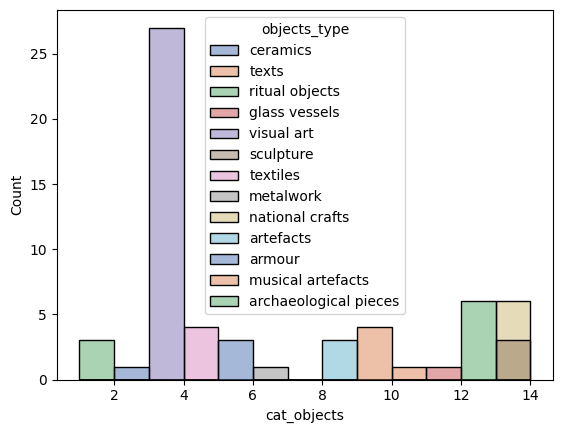

In [ ]:
#популярные и не очень объекты
sns.histplot(data=df, x="cat_objects", hue="objects_type", element="bars", legend=True, binwidth=1, palette="deep")

<Axes: xlabel='cat_regions', ylabel='Count'>

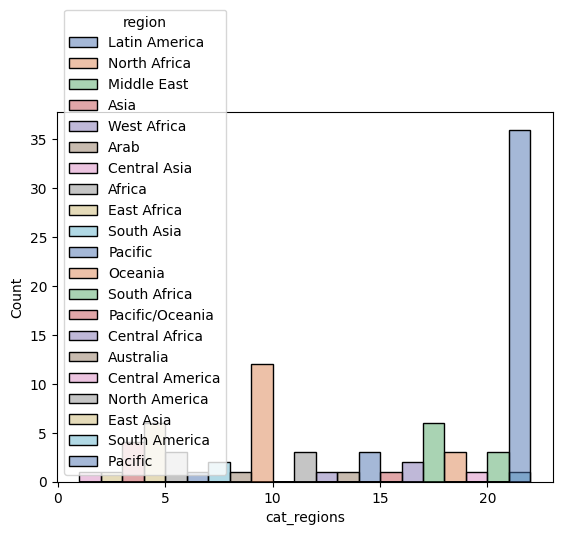

In [ ]:
#популярные и не очень регионы
sns.histplot(data=df, x="cat_regions", hue="region", element="bars", legend=True, binwidth=1, palette="deep")

<Axes: xlabel='Museum', ylabel='cat_objects'>

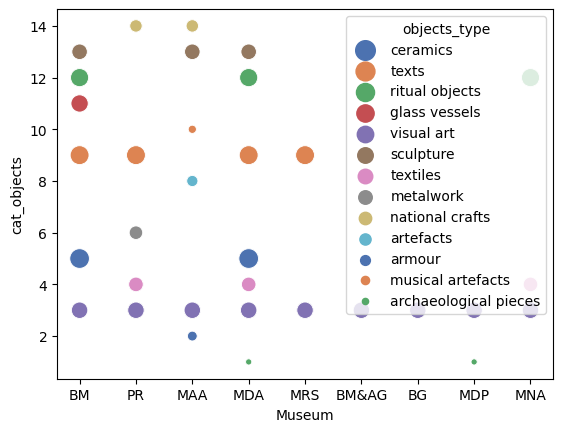

In [ ]:
#корреляция музеи-объекты
sns.scatterplot(data=df, x="Museum", y="cat_objects", hue="objects_type", size="objects_type", sizes=(20, 200), palette="deep", legend=True)

<Axes: xlabel='Museum', ylabel='cat_regions'>

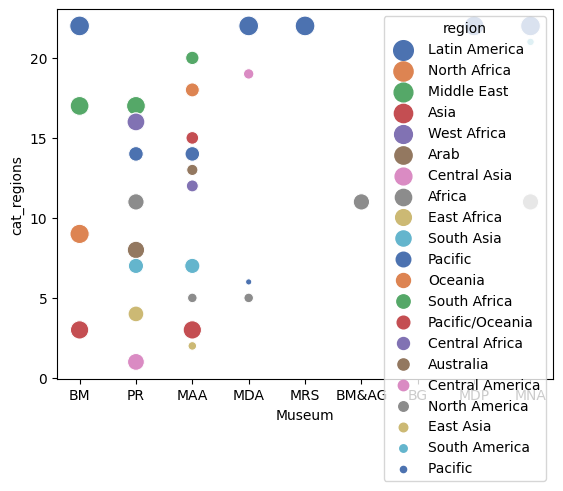

In [ ]:
#корреляция музеи-регионы
sns.scatterplot(data=df, x="Museum", y="cat_regions", hue="region", size="region", sizes=(20, 200), palette="deep")

<Axes: xlabel='cat_objects', ylabel='region'>

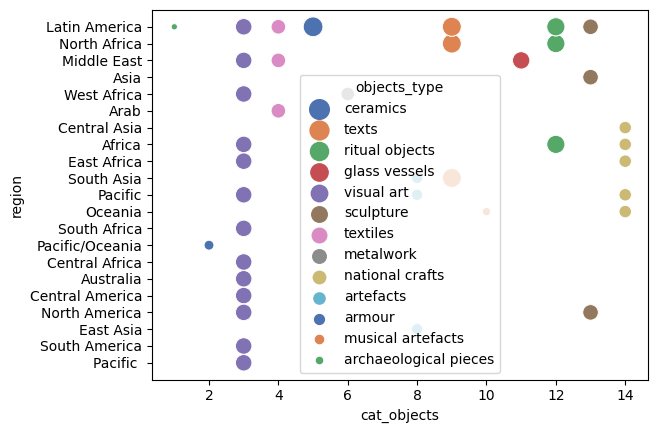

In [ ]:
#корреляция регионы-объекты
sns.scatterplot(data=df, x="cat_objects", y="region", hue="objects_type", size="objects_type", sizes=(20, 200), palette="deep", legend=True)

In [ ]:
#можно попробовать sns.clustermap